In [1]:
import nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
import pandas as pd
data=pd.read_csv('news_sentiment_analysis.csv')

print(data.columns)
print(data.size)

Index(['Source', 'Author', 'Title', 'Description', 'URL', 'Published At',
       'Sentiment', 'Type'],
      dtype='object')
28000


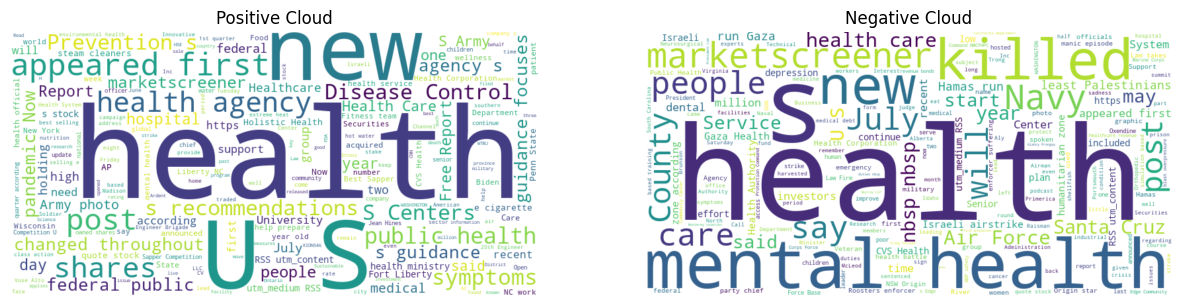

In [3]:
#   Wordcloud to show description used to describe positive and negative sentiment with news type as health

positive=data[(data['Sentiment']=='positive') & (data['Type']=='Health')]
negative=data[(data['Sentiment']=='negative') & (data['Type']=='Health')]

positive_text = " ".join(positive['Description'].astype(str))
negative_text = " ".join(negative['Description'].astype(str))


positive_wordcloud=WordCloud(width=800, height=400, max_words=200, background_color='white').generate(positive_text)
negative_wordcloud=WordCloud(width=800, height=400, max_words=200, background_color='white').generate(negative_text)
plt.figure(figsize=(15, 7.5))

#Positive Wordcloud
plt.subplot(1,2,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Cloud')
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Cloud')
plt.axis("off")
plt.show()


In [4]:
print(len(data[data['Sentiment']=='positive']))
print(len(data[data['Sentiment']=='negative']))
print(len(data[data['Sentiment']=='neutral']))
print(data.shape[1])


2134
577
789
8


In [5]:
texts = data.iloc[:, -2:]
print(texts.columns)

Index(['Sentiment', 'Type'], dtype='object')


In [6]:
import tensorflow
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization=TfidfVectorizer(max_features=2800, ngram_range=(1,2))
texts = data.iloc[:, 2]
labels = data.iloc[:, -2]
x_train, x_val, y_train, y_val=train_test_split(texts, labels, test_size=0.2, random_state=15)

#Vectorize the data
x_train_vector=vectorization.fit_transform(x_train)
print(x_train.shape)
x_val_vector=vectorization.transform(x_val)


x_train_vector=x_train_vector.todense()
x_val_vector=x_val_vector.todense()

#Hot label encoding
encoder=LabelEncoder()


(2800,)


In [7]:
# Encoding the Y model
y_train_encoded=to_categorical(encoder.fit_transform(y_train))
y_val_encoded=to_categorical(encoder.fit_transform(y_val))
y_train_encoded.shape

(2800, 3)

In [8]:
#neural Network Categorical
model=Sequential()
model.add(Dense(64, input_shape=((x_train_vector.shape[0],)), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_vector, y_train_encoded, epochs=45, validation_data=(x_val_vector, y_val_encoded), verbose=1)


0
0
0
(2800, 64)
-0.045770864827301506
0.045770864827301506
[363042162, 0]
[64]
0
(64, 16)
-0.2738612787525831
0.2738612787525831
[734508845, 0]
[16]
0
(16, 3)
-0.5619514869490163
0.5619514869490163
[275400984, 0]
[3]
0
0
0.001
[]
0
[]
0
1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
0
1
1
45
1
-1
-1
0
Epoch 1/45
[2800, 64]
0
[2800, 64]
0
[64]
0
[64]
0
[64, 16]
0
[64, 16]
0
[16]
0
[16]
0
[16, 3]
0
[16, 3]
0
[3]
0
[3]
0
[]
0
[]
0
77/88 [=========================>....] - ETA: 0s - loss: 0.9799 - accuracy: 0.6075[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0
1
1
1
1
-1
-1
0
0.0
0.0
0.0
0.0
88/88 [=====================